# Upload Files

In [1]:
from google.colab import files

uploaded = files.upload()

Saving titanic.csv to titanic.csv


# Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset


In [3]:
file_path = "titanic.csv"
df = pd.read_csv(file_path, sep=';', quotechar='"')

In [4]:
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived                            1309 no

In [6]:
df.describe()

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

,0
Passenger Class,0
Name,0
Sex,0
Age,263
No of Siblings or Spouses on Board,0
No of Parents or Children on Board,0
Ticket Number,0
Passenger Fare,1
Cabin,1014
Port of Embarkation,2


# Exploratory Data Analysis

## Survival distribution

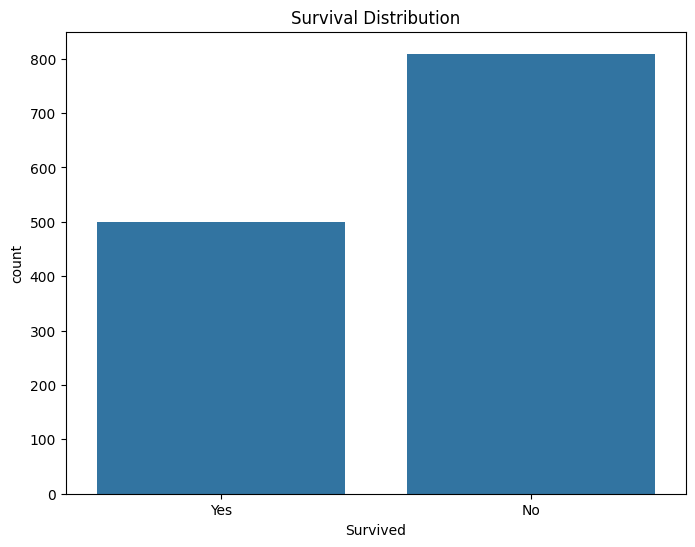

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

## Survival by gender


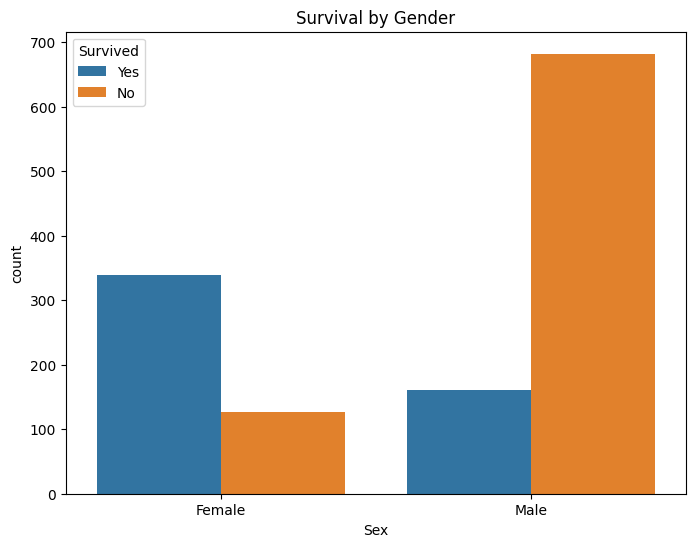

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

## Survival by passenger class

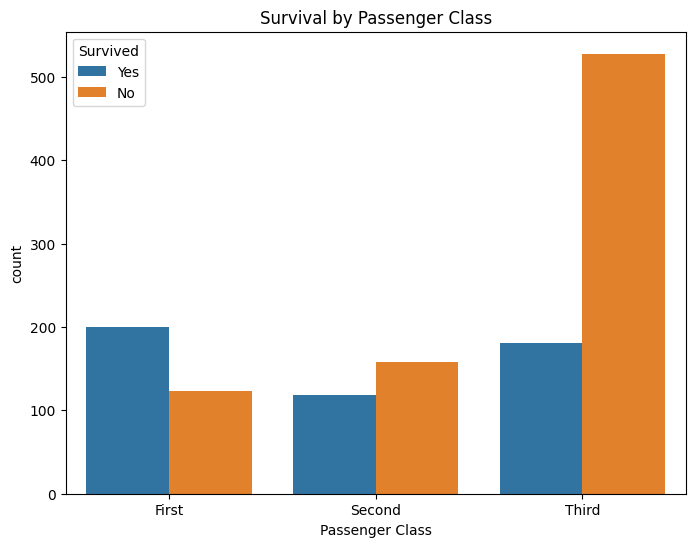

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Passenger Class', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

## Age distribution

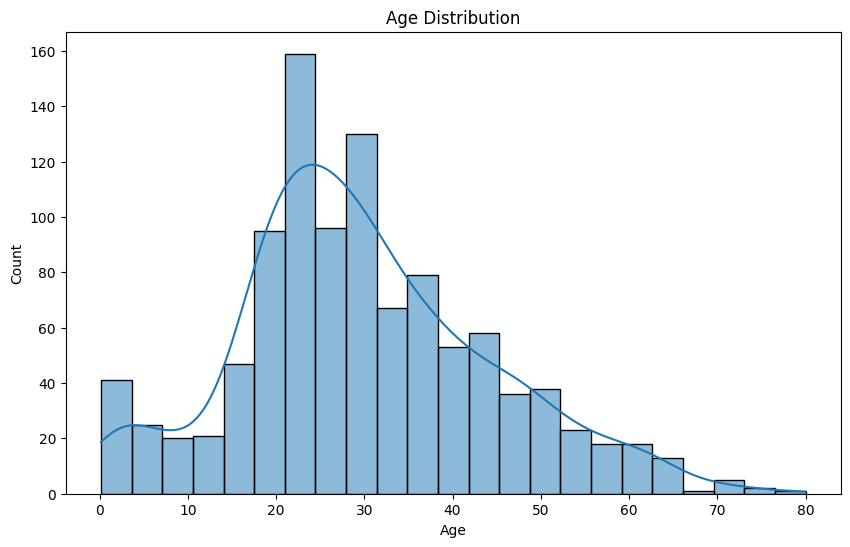

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Preprocessing Data

## Rename 'No of Siblings or Spouses on Board' and 'No of Parents or Children on Board'

In [12]:
df.rename(columns={
	'No of Siblings or Spouses on Board': 'SibSp',
	'No of Parents or Children on Board': 'ParCh',
}, inplace=True)

## Menghapus data yang tidak relevan

In [13]:
df_cleaned = df.drop(columns=["Name", "Ticket Number", "Cabin", "Life Boat"])
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived
0,First,Female,29.0000,0,0,211.3375,Southampton,Yes
1,First,Male,0.9167,1,2,151.5500,Southampton,Yes
2,First,Female,2.0000,1,2,151.5500,Southampton,No
3,First,Male,30.0000,1,2,151.5500,Southampton,No
4,First,Female,25.0000,1,2,151.5500,Southampton,No


## Menambahkan variabel baru yang bisa didapatkan dari dataset yang ada

In [14]:
df_cleaned['FamilySize'] = df_cleaned['SibSp'] + df_cleaned['ParCh'] + 1

In [15]:
df_cleaned['IsAlone'] = df_cleaned['FamilySize'].apply(lambda x: 0 if x > 1 else 1)

In [16]:
df_cleaned

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,First,Female,29.0000,0,0,211.3375,Southampton,Yes,1,1
1,First,Male,0.9167,1,2,151.5500,Southampton,Yes,4,0
2,First,Female,2.0000,1,2,151.5500,Southampton,No,4,0
3,First,Male,30.0000,1,2,151.5500,Southampton,No,4,0
4,First,Female,25.0000,1,2,151.5500,Southampton,No,4,0
...,...,...,...,...,...,...,...,...,...,...
1304,Third,Female,14.5000,1,0,14.4542,Cherbourg,No,2,0
1305,Third,Female,NaN,1,0,14.4542,Cherbourg,No,2,0
1306,Third,Male,26.5000,0,0,7.2250,Cherbourg,No,1,1
1307,Third,Male,27.0000,0,0,7.2250,Cherbourg,No,1,1


## Transformasi data

In [17]:
df_cleaned['Survived'] = df_cleaned['Survived'].map({'Yes': 1, 'No': 0})
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,First,Female,29.0000,0,0,211.3375,Southampton,1,1,1
1,First,Male,0.9167,1,2,151.5500,Southampton,1,4,0
2,First,Female,2.0000,1,2,151.5500,Southampton,0,4,0
3,First,Male,30.0000,1,2,151.5500,Southampton,0,4,0
4,First,Female,25.0000,1,2,151.5500,Southampton,0,4,0


In [18]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({'Female': 0, 'Male': 1})
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,First,0,29.0000,0,0,211.3375,Southampton,1,1,1
1,First,1,0.9167,1,2,151.5500,Southampton,1,4,0
2,First,0,2.0000,1,2,151.5500,Southampton,0,4,0
3,First,1,30.0000,1,2,151.5500,Southampton,0,4,0
4,First,0,25.0000,1,2,151.5500,Southampton,0,4,0


In [19]:
df_cleaned['Passenger Class'].value_counts()

,count
Passenger Class,
Third,709
First,323
Second,277


In [20]:
df_cleaned['Passenger Class'] = df_cleaned['Passenger Class'].map({'First': 1, 'Second': 2, 'Third': 3})
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,1,0,29.0000,0,0,211.3375,Southampton,1,1,1
1,1,1,0.9167,1,2,151.5500,Southampton,1,4,0
2,1,0,2.0000,1,2,151.5500,Southampton,0,4,0
3,1,1,30.0000,1,2,151.5500,Southampton,0,4,0
4,1,0,25.0000,1,2,151.5500,Southampton,0,4,0


## Mengisi nilai yang hilang dengan rata-rata

In [21]:
df_cleaned.isnull().sum()

,0
Passenger Class,0
Sex,0
Age,263
SibSp,0
ParCh,0
Passenger Fare,1
Port of Embarkation,2
Survived,0
FamilySize,0
IsAlone,0


In [22]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)
df_cleaned.head()

<ipython-input-22-4573434eb07a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)


,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,1,0,29.0000,0,0,211.3375,Southampton,1,1,1
1,1,1,0.9167,1,2,151.5500,Southampton,1,4,0
2,1,0,2.0000,1,2,151.5500,Southampton,0,4,0
3,1,1,30.0000,1,2,151.5500,Southampton,0,4,0
4,1,0,25.0000,1,2,151.5500,Southampton,0,4,0


In [23]:
df_cleaned['Passenger Fare'].fillna(df_cleaned['Passenger Fare'].mean(), inplace=True)
df_cleaned.head()

<ipython-input-23-98f66165c89e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Passenger Fare'].fillna(df_cleaned['Passenger Fare'].mean(), inplace=True)


,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,1,0,29.0000,0,0,211.3375,Southampton,1,1,1
1,1,1,0.9167,1,2,151.5500,Southampton,1,4,0
2,1,0,2.0000,1,2,151.5500,Southampton,0,4,0
3,1,1,30.0000,1,2,151.5500,Southampton,0,4,0
4,1,0,25.0000,1,2,151.5500,Southampton,0,4,0


In [24]:
most_freq_embarked = df_cleaned['Port of Embarkation'].mode()[0]
df_cleaned['Port of Embarkation'].fillna(most_freq_embarked, inplace=True)

<ipython-input-24-27170433f510>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Port of Embarkation'].fillna(most_freq_embarked, inplace=True)


In [25]:
df_cleaned.isnull().sum()

,0
Passenger Class,0
Sex,0
Age,0
SibSp,0
ParCh,0
Passenger Fare,0
Port of Embarkation,0
Survived,0
FamilySize,0
IsAlone,0


In [26]:
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Port of Embarkation,Survived,FamilySize,IsAlone
0,1,0,29.0000,0,0,211.3375,Southampton,1,1,1
1,1,1,0.9167,1,2,151.5500,Southampton,1,4,0
2,1,0,2.0000,1,2,151.5500,Southampton,0,4,0
3,1,1,30.0000,1,2,151.5500,Southampton,0,4,0
4,1,0,25.0000,1,2,151.5500,Southampton,0,4,0


## Mengonversi 'Port of Embarkation' ke numerik


In [27]:
df_cleaned['Port of Embarkation'].value_counts(dropna=False)

,count
Port of Embarkation,
Southampton,916
Cherbourg,270
Queenstown,123


In [28]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Port of Embarkation'])
df_cleaned.head()

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Survived,FamilySize,IsAlone,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,1,0,29.0000,0,0,211.3375,1,1,1,False,False,True
1,1,1,0.9167,1,2,151.5500,1,4,0,False,False,True
2,1,0,2.0000,1,2,151.5500,0,4,0,False,False,True
3,1,1,30.0000,1,2,151.5500,0,4,0,False,False,True
4,1,0,25.0000,1,2,151.5500,0,4,0,False,False,True


In [29]:
port_cols = [
    'Port of Embarkation_Cherbourg',
    'Port of Embarkation_Queenstown',
    'Port of Embarkation_Southampton'
]

df_cleaned[port_cols] = df_cleaned[port_cols].astype(int)

filtered = df_cleaned[df_cleaned[port_cols].sum(axis=1) >= 2]
filtered

,Passenger Class,Sex,Age,SibSp,ParCh,Passenger Fare,Survived,FamilySize,IsAlone,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton


## Memisahkan fitur (X) dan target (y)


In [30]:
X = df_cleaned.drop(columns=["Survived"])
y = df_cleaned["Survived"]

## Spliting Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standarisasi fitur untuk meningkatkan performa model


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [33]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Predictions

In [34]:
y_pred = model.predict(X_test_scaled)

## Evaluate Model

In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [36]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 82.44%
Confusion Matrix:
[[141  21]
 [ 25  75]]


* 141 benar negatif (tidak selamat, diprediksi tidak selamat)
* 21 false positif (tidak selamat, tetapi diprediksi selamat)
* 25 false negatif (selamat, tetapi diprediksi tidak selamat)
* 75 benar positif (selamat, diprediksi selamat)


In [37]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       162
           1       0.78      0.75      0.77       100

    accuracy                           0.82       262
   macro avg       0.82      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



* Precision: 85% untuk tidak selamat, dan 78% untuk yang selamat
* Recall: 87% untuk tidak selamat, dan 75% untuk yang selamat
* F1-score: 86% untuk tidak selamat, dan 77% untuk yang selamat


# Visualisation

## Confusion Matrix

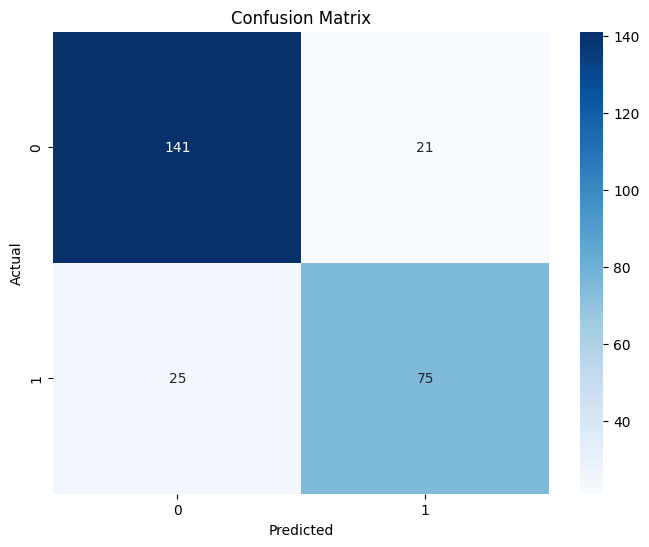

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

## Feature Importance

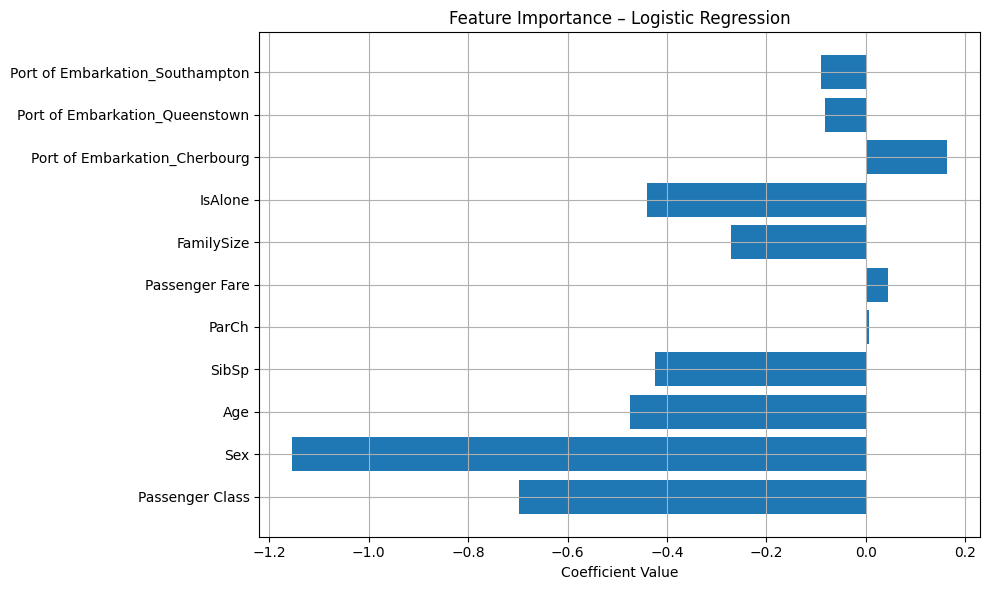

In [41]:
feature_names = X_train.columns

importance = model.coef_[0]

plt.figure(figsize=(10,6))
plt.barh(feature_names, importance)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance – Logistic Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

Dengan melihat koefisien dari Logistic Regression, kita tahu fitur mana yang paling berpengaruh

Nilai negatif artinya menurunkan kemungkinan untuk selamat, positif sebaliknya

## Heatmap Correlation Matrix

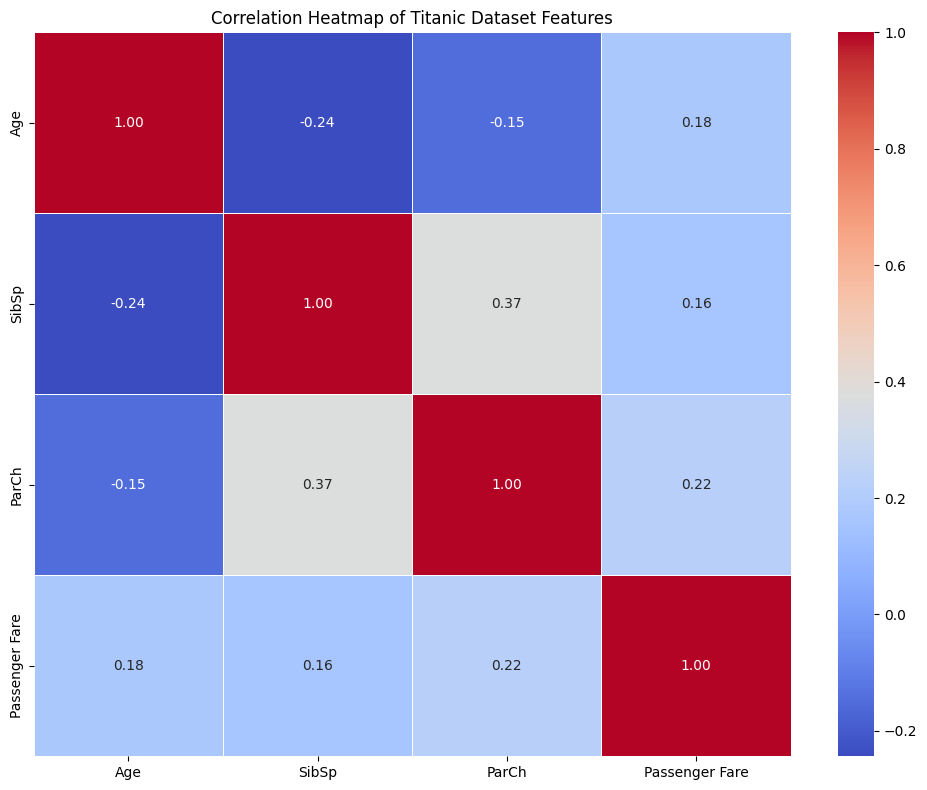

In [42]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset Features")
plt.tight_layout()
plt.show()